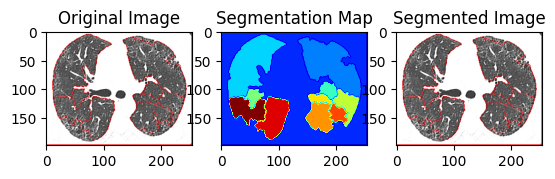

True

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('gabor_filtered_image.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that sure background is not 0 but 1
markers = markers + 1

# Mark the region of unknown with 0
markers[unknown == 255] = 0

# Apply watershed algorithm
cv2.watershed(image, markers)

# Mark segmented regions on the original image
image[markers == -1] = [0, 0, 255]  # Watershed boundaries are marked in red

# Display the results
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(markers, cmap='jet'), plt.title('Segmentation Map')
plt.subplot(133), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
plt.show()

cv2.imwrite("segmented_image.png", image)